# PAINE poster presentation
Data retention

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from serial_analysis import *

In [17]:
USE_NUM_WORDS = 4096
USE_NUM_BITS = USE_NUM_WORDS * 16

input_trials = [
    {
        #"tstart": 0.1,
        "label": "90nm",
        "nat0s": r"C:\Users\ihals\OneDrive - Colostate\RAM_Lab\Group\Izak\SRAM-retention\chips\inh1\puf-old\natural-0s.txt",
        "nat1s": r"C:\Users\ihals\OneDrive - Colostate\RAM_Lab\Group\Izak\SRAM-retention\chips\inh1\puf-old\natural-1s.txt",
        "c": "blue",
        "files": [
            r"C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\90nm-0s-upto-1ms-by-10us-1.txt",
            r"C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\90nm-0s-upto-1ms-by-10us-2.txt",
            r"C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\90nm-0s-upto-1ms-by-10us-3.txt",
            r"C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\90nm-0s-upto-1ms-by-10us-4.txt",
            r"C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\90nm-0s-upto-1ms-by-10us-5.txt",
        ],
    },

    {
        #"tstart": 1,
        "label": "150nm",
        "c": "green",
        "nat0s": r"C:\Users\ihals\OneDrive - Colostate\RAM_Lab\Group\Izak\SRAM-retention\chips\inh2\puf-old\natural-0s.txt",
        "nat1s": r"C:\Users\ihals\OneDrive - Colostate\RAM_Lab\Group\Izak\SRAM-retention\chips\inh2\puf-old\natural-1s.txt",
        "files": [
            r"C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\150nm-0s-upto-15ms-by-50us-1.txt",
            r"C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\150nm-0s-upto-15ms-by-50us-2.txt",
            r"C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\150nm-0s-upto-15ms-by-50us-3.txt",
            r"C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\150nm-0s-upto-15ms-by-50us-4.txt",
            r"C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\150nm-0s-upto-15ms-by-50us-5.txt",
        ],
    },    

    {
        "label": "250nm",
        "c": "red",
        "tstart": 200,
        "nat0s": r"C:\Users\ihals\OneDrive - Colostate\RAM_Lab\Group\Izak\SRAM-retention\chips\inh3\puf-old\natural-0s.txt",
        "nat1s": r"C:\Users\ihals\OneDrive - Colostate\RAM_Lab\Group\Izak\SRAM-retention\chips\inh3\puf-old\natural-1s.txt",
        "files": [
            r"C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\250nm-0s-from-200ms-to-2500ms-by-20ms-1.txt",
            r"C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\250nm-0s-from-200ms-to-2500ms-by-20ms-2.txt",
            r"C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\250nm-0s-from-200ms-to-2500ms-by-20ms-3.txt",
            r"C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\250nm-0s-from-200ms-to-2500ms-by-20ms-4.txt",
        ]
    }
]

original_file_path = r"C:\Users\ihals\Documents\inh\RAM-lab\test-data\256x256-all-0s.txt"

Processing trial set #1, which has 5 trials...
Processing file 'C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\90nm-0s-upto-1ms-by-10us-1.txt'
Processing file 'C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\90nm-0s-upto-1ms-by-10us-2.txt'
Processing file 'C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\90nm-0s-upto-1ms-by-10us-3.txt'
Processing file 'C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\90nm-0s-upto-1ms-by-10us-4.txt'
Processing file 'C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\90nm-0s-upto-1ms-by-10us-5.txt'
Processing trial set #2, which has 5 trials...
Processing file 'C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\150nm-0s-upto-15ms-by-50us-1.txt'
Processing file 'C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\150nm-0s-upto-15ms-by-50us-2.txt'
Processing file 'C:\Users\ihals\Documents\inh\RAM-lab\Old-summer-SRAM\data\256x256\150nm-0s-upto-

Text(0.5, 1.0, 'Bit flips times in the first 4096 words')

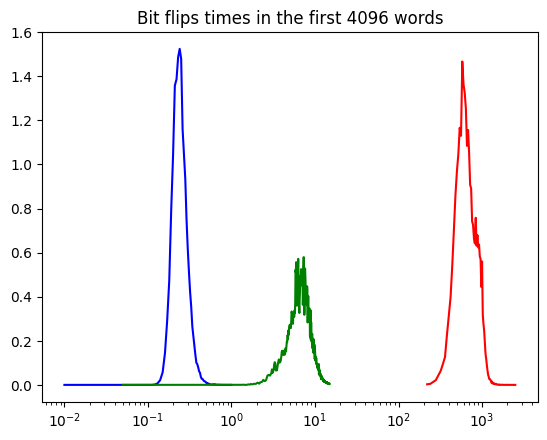

In [18]:
fig, ax = plt.subplots()

for i, trial_set in enumerate(input_trials):
    num_trials = len(trial_set["files"])
    print(f"Processing trial set #{i+1}, which has {num_trials} trials...")
    
    # Cumulative bit flips for each time and each trial
    flips_cum = {}

    for single_trial_file_path in trial_set["files"]:
        print(f"Processing file '{single_trial_file_path}'")
        with open(trial_set["nat1s"]) as nat_bits_f, open(original_file_path) as original_f, open(single_trial_file_path) as trial_f:
            flip_times = file_find_bit_flips_count_with_natural_bits(original_f, nat_bits_f, trial_f, USE_NUM_WORDS)
            for t, count in flip_times.items():
                if ("tstart" in trial_set) and (t <= trial_set["tstart"]):
                    # Ignored before the desired start time
                    continue
                if not flips_cum.get(t):
                    # New entry
                    flips_cum[t] = 0
                flips_cum[t] += count

    if 0.0 in flips_cum:
        del flips_cum[0.0]

    pairs = np.array(list(sorted(flips_cum.items())))

    # average the cumulative bit count to a percentage
    pairs[:,1] *= 100.0 / (USE_NUM_BITS * num_trials)

    ax.plot(pairs[:,0], pairs[:,1], label=trial_set["label"], c=trial_set["c"])
    ax.set_xscale('log')
    # ax.set_yscale('log')
    
ax.set_title(f"Bit flips times in the first {USE_NUM_WORDS} words")
# ax.legend()
# ax.set_ylim([0, None])